In [4]:
%run IDM_helper_functions.ipynb

## LCA parameter recovery

In [7]:
# Training data
num_simulations = 10000
#[0,0.5] for ∆I, [0,2] for I, [0,14] for κ and β, [0,1] for Z, and [0,1]
#prior = utils.BoxUniform(low=[0.05,0.05,1,1], high=[0.3,0.25,8,8])

prior = utils.BoxUniform(low=[0.05,0.8,0.05,1,1,0.2], high=[0.3,1.2,0.25,8,8,0.5])

parameters = prior.sample((num_simulations,))
x = simul_LCA_full_3AFT(np.array(parameters))

sim0
sim1000
sim2000
sim3000
sim4000
sim5000
sim6000
sim7000
sim8000
sim9000


In [6]:
x

tensor([[0.4435, 0.0000],
        [0.4742, 0.0000],
        [0.2883, 2.0000],
        ...,
        [0.4405, 2.0000],
        [0.3686, 0.0000],
        [0.4369, 1.0000]])

In [8]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior)
trainer = trainer.append_simulations(parameters, x)
mnle = trainer.train()


/Users/wangjiashun/Documents/GitHub/sbi/sbi/neural_nets/mnle.py:64: UserWarning: The mixed neural likelihood estimator assumes that x contains
        continuous data in the first n-1 columns (e.g., reaction times) and
        categorical data in the last column (e.g., corresponding choices). If
        this is not the case for the passed `x` do not use this function.
  this is not the case for the passed `x` do not use this function."""


 Neural network successfully converged after 41 epochs.

In [13]:
mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")

In [14]:
# inference with different x_o that has 10 trials
#torch.manual_seed(41)
num_trials = 100
num_samples = 1000
parameters_o = prior.sample((1,))
#x_o = simul_IDM_mult_trial(np.array(parameters_o))
x_o = simul_LCA_full_3AFT(np.array(parameters_o.repeat(num_trials, 1)))

sim0


In [15]:
mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/10100 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/wangjiashun/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_83503/1637695551.py", line 3, in <module>
    mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)
  File "/Users/wangjiashun/Documents/GitHub/sbi/sbi/inference/posteriors/mcmc_posterior.py", line 295, in sample
    show_progress_bars=show_progress_bars,
  File "/Users/wangjiashun/Documents/GitHub/sbi/sbi/inference/posteriors/mcmc_posterior.py", line 477, in _slice_np_mcmc
    samples = posterior_sampler.run(warmup_ + num_samples_)
  File "/Users/wangjiashun/Documents/GitHub/sbi/sbi/samplers/mcmc/slice_numpy.py", line 290, in run
    for initial_params_batch, seed in zip(self.x, seeds)
  File "/Users/wangjiashun/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/joblib/parallel.py", l

TypeError: object of type 'NoneType' has no len()

In [ ]:
def pair_plot(prior, mnle_samples, parameters_o, figsize = (5,5),
              contour = 0.7, labels=['I1', 'I2', 'a','Inh','k', 'Ter']):


## Simulate from ICA and fit with ICA

In [16]:
#Is = np.random.uniform(low=0.05, high=0.3, size=30)
#As = np.random.uniform(low=0.05, high=0.25, size=30)
#Inhs = np.random.uniform(low=1, high=8, size=30)
#ks = np.random.uniform(low=1, high=8, size=30)

parameters = prior.sample((30,))

#Ters = np.random.uniform(low=0.2, high=0.8, size=30)

n_trials = 1000
num_samples = 500
par_fitted = np.zeros((30,6))

In [17]:
for i in range(30):
    print(i)
    LCA_o = simul_LCA_full_3AFT(np.tile(parameters[i,:], (n_trials,1))) # simulate LCA data
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(LCA_o)
    mnle_map = mnle_posterior.map()
    print(parameters[i,:])
    print(np.array(mnle_map))
    par_fitted[i,:] = np.array(mnle_map)

0
sim0


/Users/wangjiashun/Documents/GitHub/sbi/sbi/utils/sbiutils.py:321: UserWarning: An x with a batch size of 1000 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  respect to entire batch, i.e,. p(theta | X)."""


tensor([0.2005, 1.0125, 0.0585, 5.4806, 5.0963, 0.2750])
[0.29447126 1.1846642  0.06292062 7.88781    7.6005363  0.2733651 ]
1
sim0
tensor([0.1487, 0.9267, 0.1998, 2.8179, 2.0220, 0.4600])
[0.11973256 1.0627756  0.20314854 1.0216455  7.873257   0.45790243]
2
sim0
tensor([0.0816, 1.1121, 0.0930, 1.5124, 3.4656, 0.3823])
[0.2945288  1.1893108  0.06876355 2.0793774  2.224121   0.38272482]
3
sim0
tensor([0.0967, 0.8727, 0.1085, 2.5823, 7.8791, 0.4348])
[0.27160302 0.8200473  0.08807974 1.0174897  7.3522434  0.4361471 ]
4
sim0
tensor([0.1319, 0.9170, 0.0502, 7.9395, 2.5451, 0.3799])
[0.05348213 0.81067127 0.05639971 7.9662995  1.0656857  0.3819716 ]
5
sim0
tensor([0.1523, 0.8993, 0.0972, 7.7044, 7.5374, 0.2752])
[0.28742832 1.1673529  0.0907764  1.5776055  6.9983544  0.27277058]
6
sim0
tensor([0.2841, 0.9341, 0.1618, 3.7330, 3.9465, 0.4403])
[0.29175088 0.84017676 0.15239851 1.2979488  7.369166   0.43976384]
7
sim0
tensor([0.1780, 1.1000, 0.1694, 1.0703, 7.7837, 0.2806])
[0.2633955  0.85121

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/wangjiashun/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_83503/1805986699.py", line 3, in <module>
    LCA_o = simul_LCA_full_3AFT(np.tile(parameters[i,:], (n_trials,1))) # simulate LCA data
  File "/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_83503/208307174.py", line 21, in simul_LCA_full_3AFT
    dW1, dW2, dW3 = np.random.normal()*np.sqrt(dt), np.random.normal()*np.sqrt(dt),np.random.normal()*np.sqrt(dt)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/wangjiashun/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterr

TypeError: object of type 'NoneType' has no len()

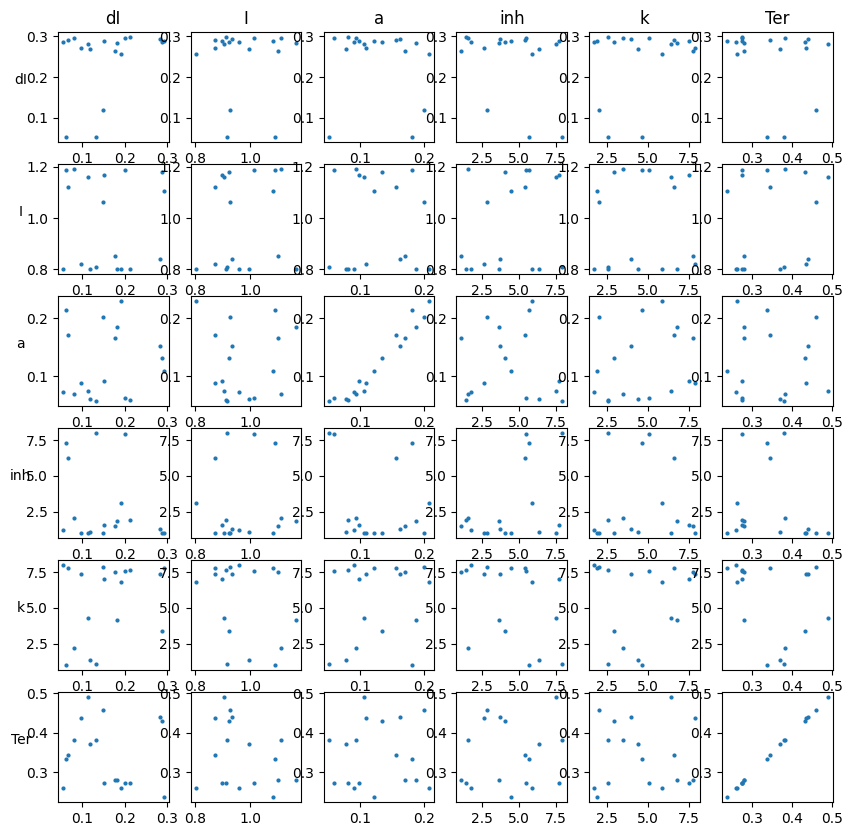

In [18]:
par_labels = ["dI", "I","a", "inh", "k","Ter"]
par_fitted_labels = ["dI", "I","a", "inh", "k","Ter"]
sim_fit_plot_all(parameters[0:18,:], par_fitted[0:18,:], par_labels, par_fitted_labels)

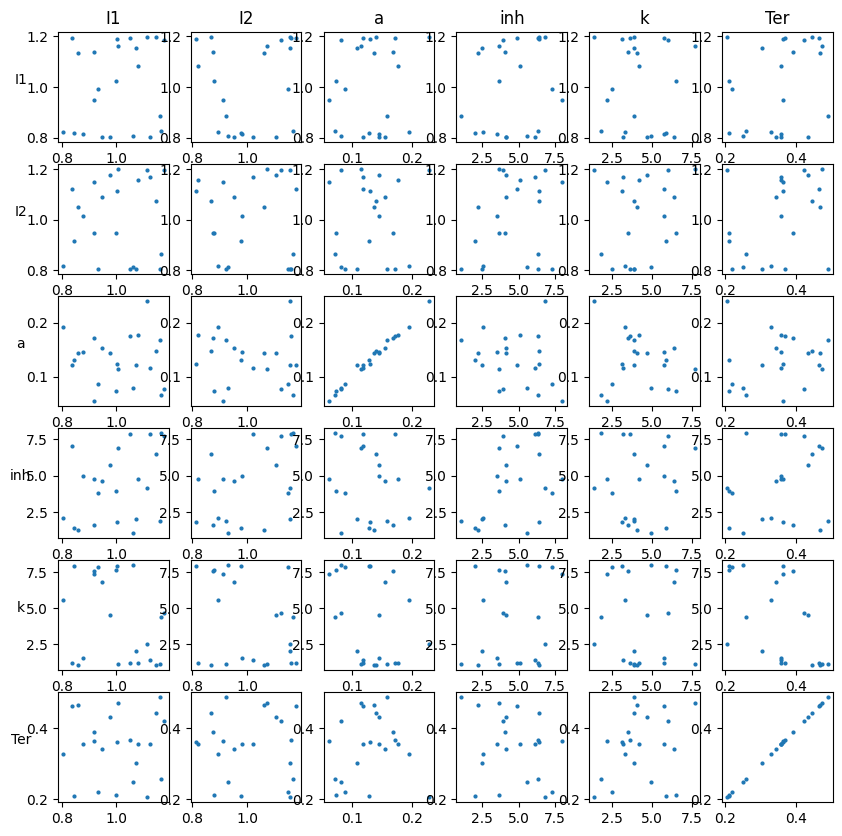

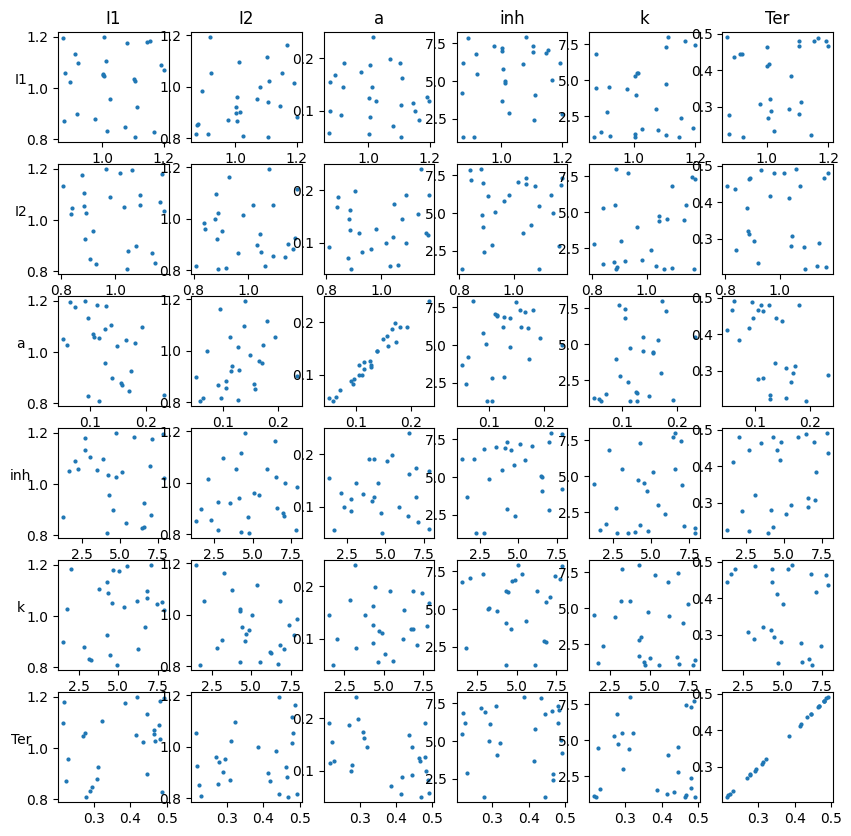

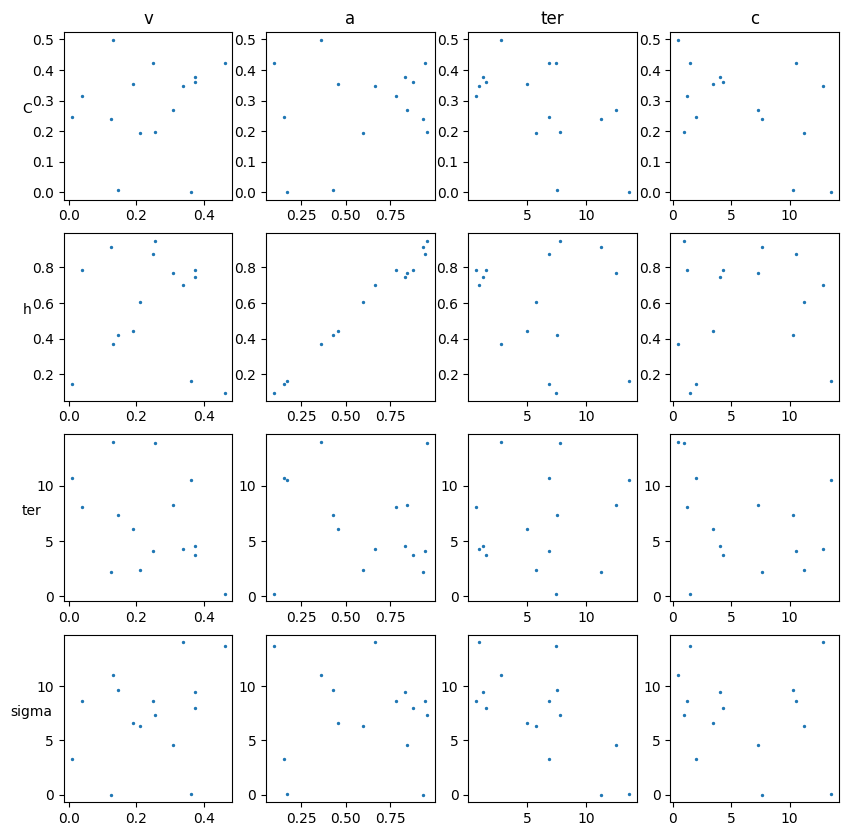

In [27]:
sim_fit_plot_4(parameters[0:15,0], parameters[0:15,1], parameters[0:15,2], parameters[0:15,3], par_fitted[0:15,:])

## Simulate from IDM and fit with ICA

In [18]:
Cs = np.random.uniform(low=0, high=0.5, size=30)
hs = np.random.uniform(low=0.2, high=0.4, size=30)
Inhs = np.random.uniform(low=8200, high=8600, size=30)
Excs = np.random.uniform(low=52300, high=52700, size=30)

#Ters = np.random.uniform(low=0.2, high=0.8, size=30)

n_trials = 200
num_samples = 100
par_fitted = np.zeros((30,3))

In [19]:
for i in range(len(Cs)):
    print(i)
    IDM_o = simul_IDM_CG_inh_pos(np.tile((Cs[i], hs[i], Inhs[i], Excs[i]), (n_trials,1))) # simulate IDM data
    print(IDM_o[0:5,:])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(IDM_o)
    mnle_map = mnle_posterior.map()
    print(np.array(mnle_map))
    par_fitted[i,:] = np.array(mnle_map)
    
    

0
sim0
tensor([[0.6040, 0.0000],
        [0.6290, 0.0000],
        [0.6160, 0.0000],
        [0.5830, 0.0000],
        [0.6520, 0.0000]])
[0.49832803 0.8016558  5.9934206 ]
1
sim0
tensor([[0.6500, 0.0000],
        [0.6260, 0.0000],
        [0.6670, 0.0000],
        [0.6450, 1.0000],
        [0.6440, 1.0000]])
[0.49999422 0.9728365  5.9983606 ]
2
sim0
tensor([[0.6090, 0.0000],
        [0.5970, 0.0000],
        [0.6110, 0.0000],
        [0.6000, 0.0000],
        [0.5990, 0.0000]])
[0.49823552 0.70273894 5.994752  ]
3
sim0
tensor([[0.5920, 0.0000],
        [0.6100, 0.0000],
        [0.6410, 0.0000],
        [0.6260, 0.0000],
        [0.6420, 0.0000]])
[0.4997586 0.8947196 5.9965606]
4
sim0
tensor([[0.6440, 0.0000],
        [0.6280, 0.0000],
        [0.6530, 0.0000],
        [0.6110, 0.0000],
        [0.5980, 0.0000]])
[0.49905163 0.923246   5.9908404 ]
5
sim0
tensor([[0.5920, 0.0000],
        [0.5910, 0.0000],
        [0.5760, 0.0000],
        [0.5730, 0.0000],
        [0.5600, 0.0000]])


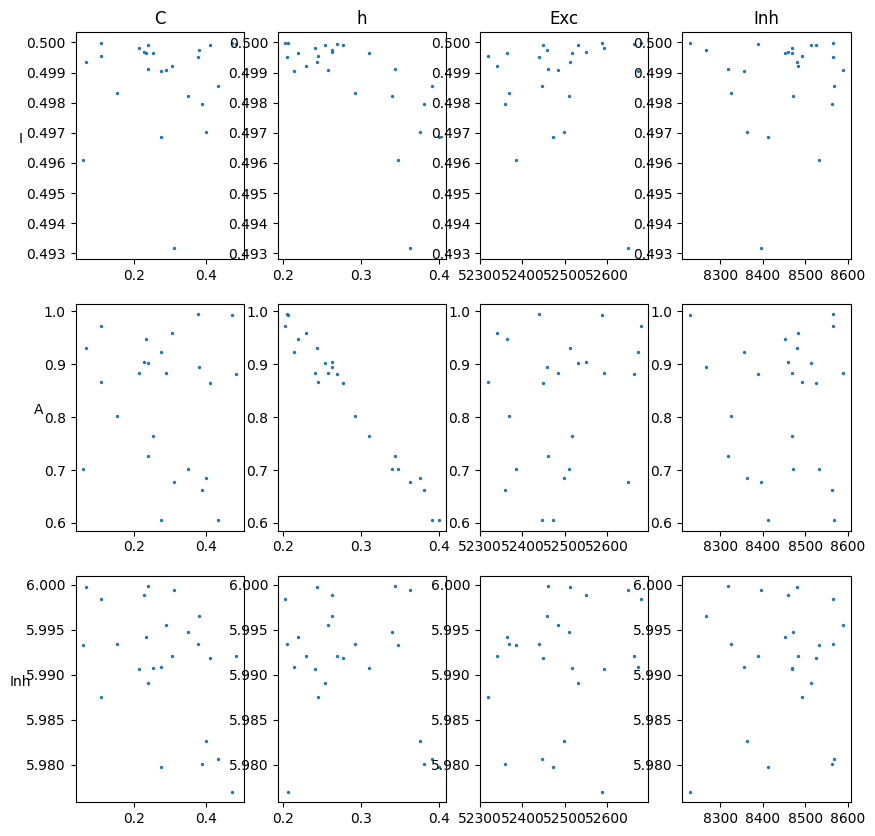

In [20]:
sim_fit_plot_IDM_LCA(Cs, hs, Excs, Inhs, par_fitted, sim_num = 25)

## Train NN for IDM 

In [148]:
# Training data
num_simulations = 40000
prior = utils.BoxUniform(low=[0,0.2,6000], high=[0.5,0.6,8000])

parameters = prior.sample((num_simulations,))
x = simul_IDM_CG_inh(np.array(parameters))

sim0
sim1000
sim2000
sim3000
sim4000
sim5000
sim6000
sim7000
sim8000
sim9000
sim10000
sim11000
sim12000
sim13000
sim14000
sim15000
sim16000
sim17000
sim18000
sim19000
sim20000
sim21000
sim22000
sim23000
sim24000
sim25000
sim26000
sim27000
sim28000
sim29000
sim30000
sim31000
sim32000
sim33000
sim34000
sim35000
sim36000
sim37000
sim38000
sim39000


In [149]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior)
trainer = trainer.append_simulations(parameters, x)
mnle = trainer.train()
mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")


 Neural network successfully converged after 70 epochs.

## IDM parameter recovery

In [ ]:
# inference with different x_o that has 10 trials
num_trials = 100
num_samples = 100
parameters_o = prior.sample((1,))
#x_o = simul_IDM_mult_trial(np.array(parameters_o))
x_o = simul_IDM_CG_inh(np.array(parameters_o.repeat(num_trials, 1)))

In [ ]:
mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

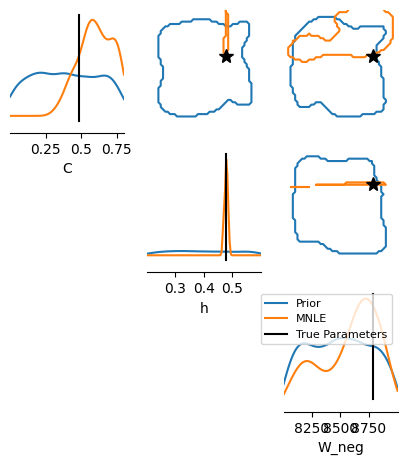

In [95]:
#pair_plot(prior, mnle_samples, parameters_o, 
contour = 0.7

fig, ax = pairplot(
    [
        prior.sample((1000,)),
        mnle_samples,
    ],
    points=parameters_o,
    diag="kde",
    upper="contour",
    kde_offdiag=dict(bins=50),
    kde_diag=dict(bins=100),
    contour_offdiag=dict(levels=[contour]),
    points_colors=["k"],
    points_offdiag=dict(marker="*", markersize=10),
    labels=['C', 'h','W_neg'],
    figsize=(5, 5)
)

#plt.sca(ax[1, 1])
plt.legend(
    ["Prior", "MNLE", 'True Parameters'],
    #frameon=False,
    fontsize=8,
    loc = 1
);

## Simulate from LCA and fit with IDM

In [150]:
Is = np.random.uniform(low=0.1, high=4, size=30)
As = np.random.uniform(low=0.4, high=0.8, size=30)
Inhs = np.random.uniform(low=0.1, high=4, size=30)
#Ters = np.random.uniform(low=0.2, high=0.8, size=30)

n_trials = 500
num_samples = 100
par_fitted = np.zeros((30,3))

In [151]:
for i in range(len(Is)):
    print(i)
    LCA_o = simul_LCA(np.tile((Is[i], As[i], Inhs[i]), (n_trials,1))) # simulate IDM data
    print(LCA_o[0:5,:])
    #prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.6,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(LCA_o)
    mnle_map = mnle_posterior.map()
    print(np.array(mnle_map))
    par_fitted[i,:] = np.array(mnle_map)
    
    

0
tensor([[1.4020, 0.0000],
        [0.8870, 0.0000],
        [0.5680, 1.0000],
        [0.6120, 1.0000],
        [0.7680, 0.0000]])
[2.0425561e-01 4.0492842e-01 6.8782568e+03]
1
tensor([[0.5740, 0.0000],
        [0.6490, 0.0000],
        [0.5950, 0.0000],
        [0.6080, 0.0000],
        [0.6730, 0.0000]])
[3.1178629e-01 4.0015432e-01 6.7044673e+03]
2
tensor([[0.6520, 0.0000],
        [0.6730, 0.0000],
        [0.5450, 0.0000],
        [0.6270, 0.0000],
        [0.5610, 0.0000]])
[3.2582918e-01 3.7295932e-01 6.6481040e+03]
3
tensor([[0.7700, 1.0000],
        [0.5440, 1.0000],
        [0.8770, 0.0000],
        [0.6530, 1.0000],
        [0.8140, 0.0000]])
[3.1458724e-01 3.6899114e-01 6.6702173e+03]
4
tensor([[0.7770, 0.0000],
        [0.6260, 0.0000],
        [0.5700, 0.0000],
        [0.5200, 0.0000],
        [0.5620, 0.0000]])
[3.3504364e-01 4.6827739e-01 6.6119951e+03]
5
tensor([[0.5310, 0.0000],
        [0.5920, 0.0000],
        [0.7040, 0.0000],
        [0.6560, 0.0000],
        [

Text(0, 0.5, 'W_neg')

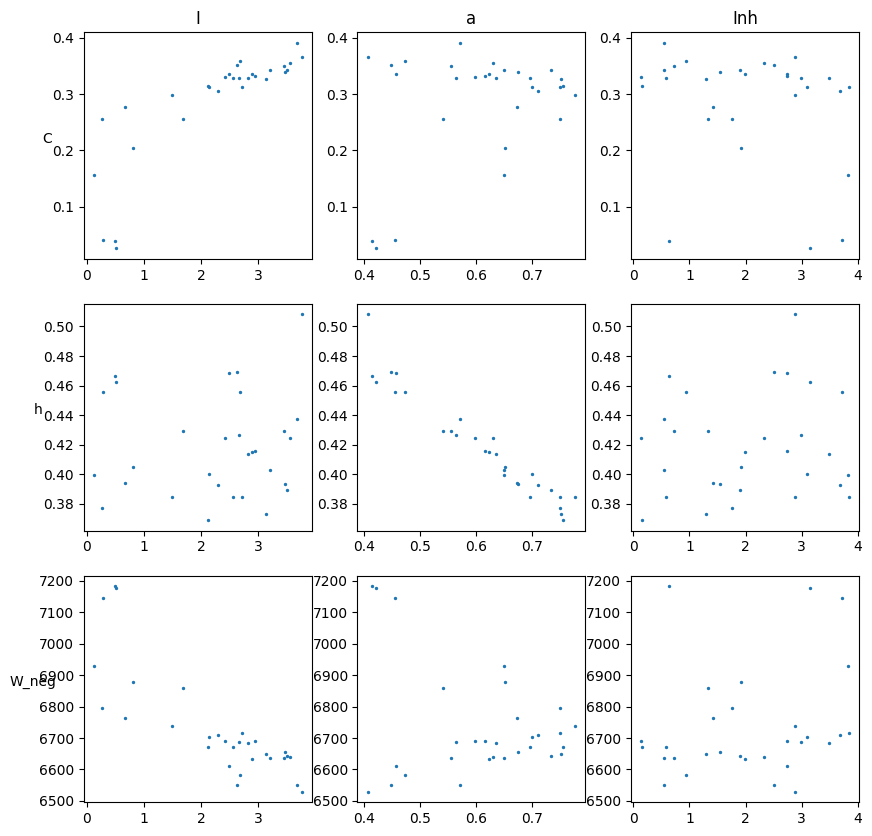

In [152]:
sim_num = 30
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Is[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Is[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Is[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("I")
ax2.set_title("a")
ax3.set_title("Inh")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("W_neg", rotation=0)

Text(0, 0.5, 'W_neg')

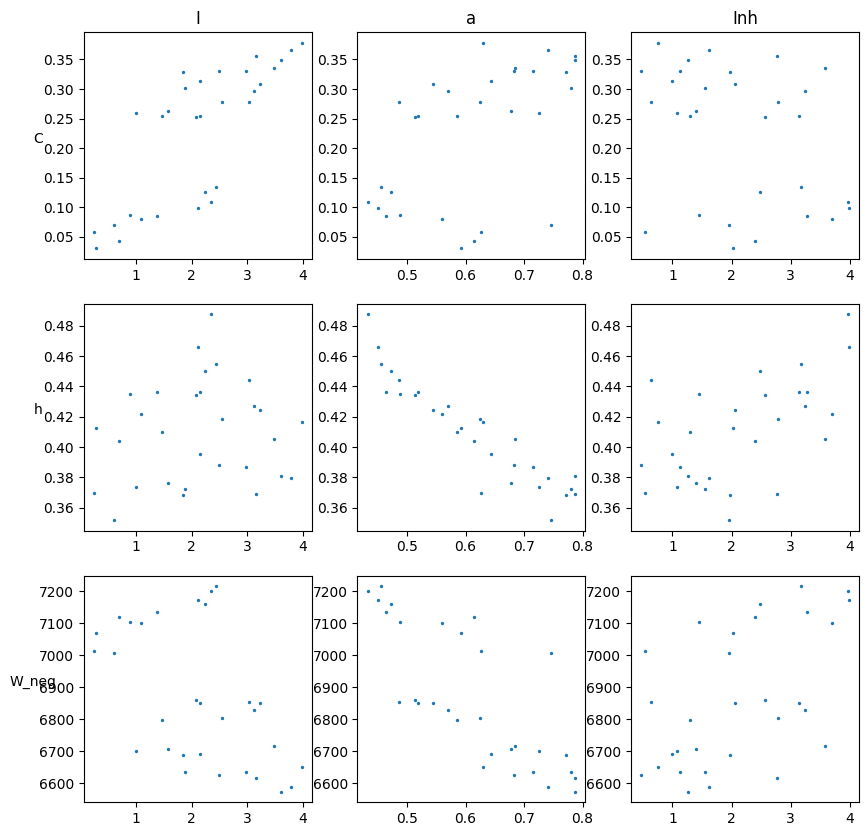

In [147]:
sim_num = 30
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Is[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Is[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Is[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("I")
ax2.set_title("a")
ax3.set_title("Inh")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("W_neg", rotation=0)